This notebook just allows you to perform basic assessment of segmentation performance

In [4]:
import PyPollen as pyp
from pathlib import Path
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [3]:
#Run so you can see images - Use the interrupt the kernel button next to run in the toolbar to stop it
pyp.plot_analysis_on_images(Path("Saps excuded\Included SAPS"))

NameError: name 'pyp' is not defined

In [9]:
#Gets filenames of all images in image dataset
df=pd.DataFrame()
#Change "Saps excuded\Included SAPS" to filepath of input images
for a in Path("Saps excuded\Included SAPS").glob("*.jpg"):
    df=df.append(pyp.get_props(a))

df.index.name = 'image'
df

,ASM,Area,Bounding_box,Contrast,Correlation,Dissimilarity,Eccentricity,Energy,Entropy,Equivalent_diameter,Euler_number,Extent,Filled_area,Homogeneity,Major_axis_length,Minor_axis_length,Perimeter,Solidity,img_h
image,,,,,,,,,,,,,,,,,,,
Agapanthus praecox v%2320BCC6,0.057415,11990.0,"(57, 201, 163, 354)",208.166633,0.947628,7.384441,0.810753,0.239573,5.617102,123.556231,1.0,0.739302,11990.0,0.334780,161.895674,94.771737,431.989899,0.990500,450.0
Agapanthus praecox v%2320BCC6,0.059602,12129.0,"(271, 185, 417, 297)",224.602326,0.953451,7.561683,0.704562,0.244109,5.385280,124.270360,1.0,0.741744,12129.0,0.339332,148.277652,105.224128,427.646753,0.986017,450.0
Agave tequilana1,0.160429,8223.0,"(185, 51, 300, 174)",613.582595,0.927559,5.273291,0.501431,0.400510,4.709049,102.322279,1.0,0.581336,8223.0,0.621104,112.016992,96.916868,508.368578,0.823948,450.0
Agrimonia eupatoria,0.034694,5319.0,"(196, 282, 283, 359)",149.130421,0.940848,5.120454,0.596490,0.186174,5.478714,82.294357,1.0,0.793999,5319.0,0.354798,92.077900,73.903577,275.379726,0.985000,450.0
Albuca canadiensis1,0.071989,40533.0,"(84, 221, 361, 423)",152.893727,0.974669,6.116886,0.752502,0.268298,5.528426,227.174423,1.0,0.724399,40533.0,0.364400,281.021579,185.077882,789.979797,0.988706,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisteria sinensis,0.035201,4892.0,"(17, 392, 95, 471)",177.732543,0.920053,5.994535,0.260787,0.187558,5.194683,78.922037,1.0,0.793898,4892.0,0.325743,80.344652,77.564440,256.693434,0.990684,450.0
Wisteria sinensis,0.036843,3791.0,"(80, 269, 149, 339)",250.074391,0.909598,6.265178,0.299269,0.191840,5.203956,69.475543,1.0,0.784886,3791.0,0.339502,71.395459,68.123315,232.066017,0.981108,450.0
Yucca whipplei,0.137423,21692.0,"(94, 226, 285, 410)",288.622046,0.959611,4.129333,0.633186,0.370697,4.975122,166.189988,1.0,0.617232,21692.0,0.531499,193.522962,149.786698,741.269119,0.887670,450.0


In [10]:
#Get list of names in index of grain detection
names=[]
for a in df.index:
    if a in names:
        continue
    else:
        names.append(a)
#Because each grain in an image has the same index value, I had to get the list and use .loc to get all rows with the same index
detectdf = pd.DataFrame(columns=['Detected'])
detectdf.index.name ='Image'
for a in names:
    b = df.loc[a]['Area'].size
    #Some images got random numbers and errors in their filenames when i first downloaded them, but yours may not so you can probably remove the .replace functions (Keep the numbers ones though)
    detectdf = detectdf.append(pd.Series([b],index=['Detected'], name=a.replace('%2320BCC','').replace('%2320BD','').replace('%2320BD7E','').replace('%2320BD9D','').replace('%2320BE2C','').replace('%2320BE','').replace(' %2320BEB1','').replace('%2320BEBA','').replace('%2320BED8','').replace('%2320BEEE','').replace('%2320BEEF','').replace('%2320BF','').replace('JPG','').replace('%2320C','').replace('%2320C01D','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','').replace('0','').replace('%','')))
detectdf

,Detected
Image,
Agapanthus praecox v,2
Agave tequilana,1
Agrimonia eupatoria,1
Albuca canadiensis,1
Albuca canadiensis,1
...,...
Vincetoxicum fuscatum,1
Wisteria sinensis,2
Yucca whipplei,1


In [11]:
#Create dataframe with actual number of grains in each image (for SAPS)
headers = ['Image', 'Actual']
read = pd.read_csv(r"C:\Users\pinto\OneDrive - University of Edinburgh\coding\finalcount.csv",engine='python', names=headers)
countdf = pd.DataFrame(read)
count = countdf['Actual']
image = countdf['Image'].apply(lambda x: x.replace('%2320BCC','').replace('%2320BD','').replace('%2320BD7E','').replace('%2320BD9D','').replace('%2320BE2C','').replace('%2320BE','').replace(' %2320BEB1','').replace('%2320BEBA','').replace('%2320BED8','').replace('%2320BEEE','').replace('%2320BEEF','').replace('%2320BF','').replace('JPG','').replace('%2320C','').replace('%2320C01D','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','').replace('0','').replace('%',''))
fullcountdf = pd.concat([image,count],axis=1).set_index('Image')
fullcountdf

,Actual
Image,
Aesculus parviflora,8
Agapanthus praecox v,2
Agapanthus praecox v,1
Agave tequilana,1
Agave tequilana,3
...,...
Yucca whipplei,1
Zantedeschia aethiopica,1
Zauschneria californica,1


In [12]:
#Merge the actual and detected count into one dataframe
countdf = pd.DataFrame.merge(fullcountdf, detectdf, on ='Image')
countdf

,Actual,Detected
Image,,
Agapanthus praecox v,2,2
Agapanthus praecox v,1,2
Agave tequilana,1,1
Agave tequilana,3,1
Agrimonia eupatoria,1,1
...,...,...
Vincetoxicum fuscatum,1,1
Wisteria sinensis,6,2
Yucca whipplei,1,1


Pearson's rank = 0.21328899584130445


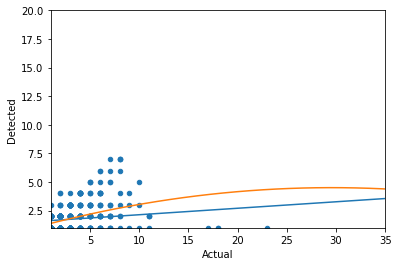

In [13]:
#Plot of proportion of detected grains
xi ='Actual'
yi ='Detected'
x = np.float64(countdf[xi])
y = np.float64(countdf[yi])
zl = np.polynomial.polynomial.Polynomial.fit(x, y, 1)
zp = np.polynomial.polynomial.Polynomial.fit(x, y, 2)

linear = []
poly = []
ytl = []

for q in np.linspace(x.min(),x.max()):
    poly.append(zp(q))
    linear.append(zl(q))
    ytl.append(q)

linear= pd.DataFrame(linear,index=ytl)
poly = pd.DataFrame(poly,index=ytl)
trendline = pd.merge(linear,poly, left_index=True,right_index=True,how='left')

fig, ax = plt.subplots()
ax.plot(trendline)
 
countdf.plot(kind='scatter',x=xi, y=yi, ax=ax, xlim=(x.min(),35), ylim=(y.min(),20))
print("Pearson's rank = " + str(scipy.stats.pearsonr(x, y)[0])) 

In [14]:
#This is in the truesizes.csv but this is for the reduced SAPS dataset only
sizes = pd.read_csv(r"C:\Users\pinto\OneDrive - University of Edinburgh\coding\SAPS\SAPSsizes.csv")
sizesdf = pd.DataFrame(sizes)
sizesdf.replace('1','')
sizesdf

,image,size
0,Abies nordmanniana1,100
1,Abutilon ochsenii1,48
2,Acacia pravissima1,45
3,Acer campestre,25
4,Acer palmatum,23
...,...,...
658,Yucca whipplei,65
659,Zantedeschia aethiopica,35
660,Zauschneria californica,140
661,Zea mays,95


In [26]:
mergedDf = pd.DataFrame.merge(sizesdf, df['Equivalent_diameter'], on ='image')
mergedDf=mergedDf.set_index('image')
mergedDf

,size,Equivalent_diameter
image,,
Agrimonia eupatoria,23,82.294357
Alcea rosea,110,337.545721
Allium karataviense,30,60.260096
Allium karataviense,30,63.730951
Allium paradoxum v. normale,30,64.918587
Allium paradoxum v. normale,30,63.740940
Allium paradoxum v. normale,30,86.591614
Allium paradoxum v. normale,30,62.469826
Anemone nemorosa,25,63.500785


In [22]:
factor40 = 0.544007
sd40 = 0.281672

factor100 = 2.641074
sd100 = 0.372058

meansizedf = pd.DataFrame(columns=['size','Equivalent_diameter'])

for i,a in enumerate(names):
    try:
        partialdf = mergedDf.loc[a.replace('%2320BCC','').replace('%2320BD','').replace('%2320BD7E','').replace('%2320BD9D','').replace('%2320BE2C','').replace('%2320BE','').replace(' %2320BEB1','').replace('%2320BEBA','').replace('%2320BED8','').replace('%2320BEEE','').replace('%2320BEEF','').replace('%2320BF','').replace('JPG','').replace('%2320C','').replace('%2320C01D','').replace('1','').replace('2','').replace('3','').replace('4','').replace('5','').replace('6','').replace('7','').replace('8','').replace('9','').replace('0','').replace('%','')]
    except:
        continue   
    meansizedf=meansizedf.append(partialdf)
meansizedf

,size,Equivalent_diameter
Agrimonia eupatoria,23.0,82.294357
Alcea rosea,110.0,337.545721
Allium karataviense,30.0,60.260096
Allium karataviense,30.0,63.730951
Allium paradoxum v. normale,30.0,64.918587
Allium paradoxum v. normale,30.0,63.740940
Allium paradoxum v. normale,30.0,86.591614
Allium paradoxum v. normale,30.0,62.469826
Anemone nemorosa,25.0,63.500785
Anemone nemorosa,25.0,59.344592


In [23]:
meansizedf['x40']=meansizedf['Equivalent_diameter']*0.618781
meansizedf['x40SD']=meansizedf['Equivalent_diameter']*0.281672
meansizedf['x100']=meansizedf['Equivalent_diameter']*2.586635
meansizedf['x100SD']=meansizedf['Equivalent_diameter']*0.372058

yes=[]
for a,b in meansizedf.iterrows():    
    ahigh=b['x40']+(2*b['x40SD'])
    alow=b['x40']-(2*b['x40SD'])
    
    bhigh=b['x100']+(2*b['x100SD'])
    blow=b['x100']-(2*b['x100SD'])        
    if ahigh > b['size'] > alow and bhigh > b['size'] > blow:
        yes.append('either')
    elif ahigh > b['size'] > alow:
        yes.append('40x')
    elif bhigh > b['size'] > blow:
        yes.append('100x')
    else:
        yes.append('unknown')
meansizedf['magnification']=pd.Series(yes, index=meansizedf.index)
#meansizedf=meansizedf.drop('x40',axis=1).drop('x40SD',axis=1).drop('x100',axis=1).drop('x100SD',axis=1)
meansizedf

,size,Equivalent_diameter,x40,x40SD,x100,x100SD,magnification
Agrimonia eupatoria,23.0,82.294357,50.922184,23.180016,212.865463,30.618274,40x
Alcea rosea,110.0,337.545721,208.866879,95.077178,873.107577,125.586586,40x
Allium karataviense,30.0,60.260096,37.287803,16.973582,155.870874,22.420251,40x
Allium karataviense,30.0,63.730951,39.435502,17.951225,164.848709,23.711610,40x
Allium paradoxum v. normale,30.0,64.918587,40.170388,18.285748,167.920688,24.153480,40x
Allium paradoxum v. normale,30.0,63.740940,39.441682,17.954038,164.874545,23.715327,40x
Allium paradoxum v. normale,30.0,86.591614,53.581246,24.390433,223.980900,32.217103,40x
Allium paradoxum v. normale,30.0,62.469826,38.655142,17.596001,161.586639,23.242399,40x
Anemone nemorosa,25.0,63.500785,39.293079,17.886393,164.253352,23.625975,40x
Anemone nemorosa,25.0,59.344592,36.721306,16.715710,153.502798,22.079630,40x


In [24]:
new=[]
for a,b in meansizedf.iterrows():
    if b['magnification'] == '40x':
        new.append(b['x40'])
    elif b['magnification'] == '100x':
        new.append(b['x100'])
    elif b['magnification'] == 'unknown':
        continue
meansizedfs = meansizedf[meansizedf.magnification != 'unknown']
meansizedfs['value']=pd.Series(new,index=meansizedfs.index)
meansizedfs

<ipython-input-24-6629252214f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meansizedfs['value']=pd.Series(new,index=meansizedfs.index)


,size,Equivalent_diameter,x40,x40SD,x100,x100SD,magnification,value
Agrimonia eupatoria,23.0,82.294357,50.922184,23.180016,212.865463,30.618274,40x,50.922184
Alcea rosea,110.0,337.545721,208.866879,95.077178,873.107577,125.586586,40x,208.866879
Allium karataviense,30.0,60.260096,37.287803,16.973582,155.870874,22.420251,40x,37.287803
Allium karataviense,30.0,63.730951,39.435502,17.951225,164.848709,23.711610,40x,39.435502
Allium paradoxum v. normale,30.0,64.918587,40.170388,18.285748,167.920688,24.153480,40x,40.170388
Allium paradoxum v. normale,30.0,63.740940,39.441682,17.954038,164.874545,23.715327,40x,39.441682
Allium paradoxum v. normale,30.0,86.591614,53.581246,24.390433,223.980900,32.217103,40x,53.581246
Allium paradoxum v. normale,30.0,62.469826,38.655142,17.596001,161.586639,23.242399,40x,38.655142
Anemone nemorosa,25.0,63.500785,39.293079,17.886393,164.253352,23.625975,40x,39.293079
Anemone nemorosa,25.0,59.344592,36.721306,16.715710,153.502798,22.079630,40x,36.721306


Pearson's rank = 0.8545273662134333


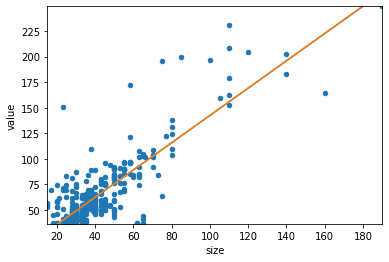

In [25]:
#This is the size comparison graph (Real vs measured)
xi ='size'
yi ='value'
x = np.float64(meansizedfs[xi])
y = np.float64(meansizedfs[yi])
zl = np.polynomial.polynomial.Polynomial.fit(np.float64(meansizedfs[xi]), np.float64(meansizedfs[yi]), 1)
zp = np.polynomial.polynomial.Polynomial.fit(x, y, 2)

linear1 = []
poly = []
ytl = []

for q in np.linspace(x.min(),x.max()):
    poly.append(zp(q))
    linear1.append(zl(q))
    ytl.append(q)

linear= pd.DataFrame(linear1,index=ytl)
poly = pd.DataFrame(poly,index=ytl)
trendline = pd.merge(linear,poly, left_index=True,right_index=True,how='left')

fig, ax = plt.subplots()
ax.plot(trendline)
 
meansizedfs.plot(kind='scatter',x=xi, y=yi, ax=ax, xlim=(x.min(),x.max()), ylim=(y.min(),y.max()))
print("Pearson's rank = " + str(scipy.stats.pearsonr(x, y)[0])) 